## Boston House Price Dataset
http://lib.stat.cmu.edu/datasets/boston The dataset was built in 1978 with 500 samples and 13 features.

In [1]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.
/Users/alvinjin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
x_train[0]

array([   1.23247,    0.     ,    8.14   ,    0.     ,    0.538  ,
          6.142  ,   91.7    ,    3.9769 ,    4.     ,  307.     ,
         21.     ,  396.9    ,   18.72   ])

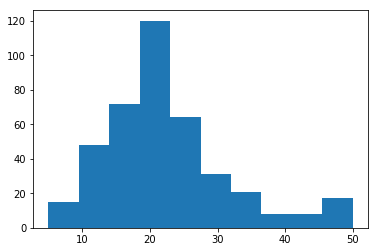

In [3]:
import matplotlib.pyplot as plt

plt.hist(y_train)
plt.show()

## Feature Normalization

In [4]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

## Build the neural network

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [7]:
from keras import optimizers
model.compile(optimizer=optimizers.Adam(lr=0.001), 
              loss='mse', 
              metrics=['mae'])

In [8]:
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=4
                   )

Epoch 1/100
404/404 [==============================] - 0s 881us/step - loss: 370.3142 - mean_absolute_error: 16.5206
Epoch 2/100
404/404 [==============================] - 0s 291us/step - loss: 48.8158 - mean_absolute_error: 5.0251
Epoch 3/100
404/404 [==============================] - 0s 294us/step - loss: 24.7741 - mean_absolute_error: 3.5556
Epoch 4/100
404/404 [==============================] - 0s 297us/step - loss: 18.5380 - mean_absolute_error: 3.0659
Epoch 5/100
404/404 [==============================] - 0s 339us/step - loss: 15.8086 - mean_absolute_error: 2.8477
Epoch 6/100
404/404 [==============================] - 0s 309us/step - loss: 13.9797 - mean_absolute_error: 2.6783
Epoch 7/100
404/404 [==============================] - 0s 329us/step - loss: 13.2289 - mean_absolute_error: 2.5780
Epoch 8/100
404/404 [==============================] - 0s 315us/step - loss: 11.8939 - mean_absolute_error: 2.4374
Epoch 9/100
404/404 [==============================] - 0s 294us/step - loss: 1

404/404 [==============================] - 0s 301us/step - loss: 3.6050 - mean_absolute_error: 1.3740
Epoch 72/100
404/404 [==============================] - 0s 296us/step - loss: 4.3655 - mean_absolute_error: 1.5356
Epoch 73/100
404/404 [==============================] - 0s 303us/step - loss: 3.5841 - mean_absolute_error: 1.4157
Epoch 74/100
404/404 [==============================] - 0s 417us/step - loss: 3.3448 - mean_absolute_error: 1.3490
Epoch 75/100
404/404 [==============================] - 0s 313us/step - loss: 3.5107 - mean_absolute_error: 1.3633
Epoch 76/100
404/404 [==============================] - 0s 300us/step - loss: 3.5375 - mean_absolute_error: 1.3798
Epoch 77/100
404/404 [==============================] - 0s 303us/step - loss: 3.2573 - mean_absolute_error: 1.2736
Epoch 78/100
404/404 [==============================] - 0s 304us/step - loss: 3.2281 - mean_absolute_error: 1.3314
Epoch 79/100
404/404 [==============================] - 0s 304us/step - loss: 3.2524 - mean_a

In [9]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 181us/step


[11.702928430893841, 2.3354350351819804]